# Insurance Dataset Analysis

## Introduction
This notebook focuses on the analysis and predictive modeling of the Insurance Dataset, which contains information about individuals' demographic, behavioral, and health-related attributes. The target variable, `charges`, represents the medical costs incurred by each individual.

This analysis aims to:
- Explore the dataset to identify key trends and relationships.
- Build predictive models to estimate medical charges based on individual attributes.
- Compare model performance and interpret key factors influencing predictions.

The notebook is organized according to the machine learning pipeline: Exploratory Data Analysis (EDA), Preprocessing, Model Training, Evaluation, and Interpretation.


In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_squared_error as root_mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

## Load Dataset
The Insurance Dataset is loaded into the notebook for further analysis. Missing values and data structure are reviewed to ensure quality before moving to further steps.

In [155]:
idataset = pd.read_csv("insurance-adapted.csv")

In [157]:
# Check for missing values
idataset.isnull().sum()

age         20
sex          0
bmi          0
children     0
smoker       0
region       0
charges      0
dtype: int64

In [159]:
idataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1318 non-null   float64
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.3+ KB


In [161]:
idataset.describe()

age          bmi     children       charges
count  1318.000000  1338.000000  1338.000000   1338.000000
mean     39.216237    30.663397     1.094918  13270.422265
std      14.083151     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      26.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## Exploratory Data Analysis (EDA)
This section explores the dataset to understand its structure, distribution, and relationships among features. Key visualizations include histograms, correlation heatmaps, and boxplots.

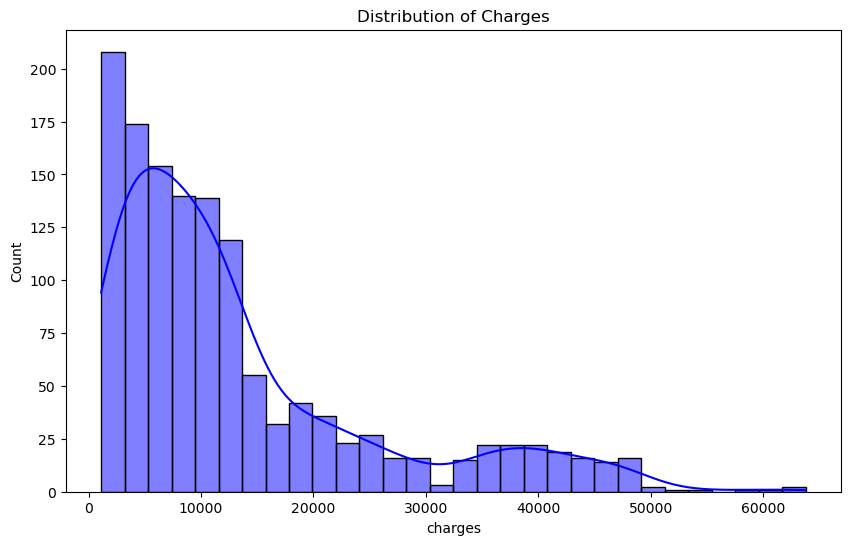

In [164]:
# Visualize the target variable distribution
plt.figure(figsize=(10, 6))
sns.histplot(idataset['charges'], kde=True, color='blue')
plt.title('Distribution of Charges')
plt.show()

This histogram illustrates the distribution of charges, which is heavily right-skewed, indicating that most charges are relatively low, concentrated below 15,000, while higher charges are rare but extreme, exceeding 40,000 in some cases. The smooth KDE (Kernel Density Estimation) line highlights the probability density, emphasizing the prevalence of lower charges and the gradual decline as charges increase.

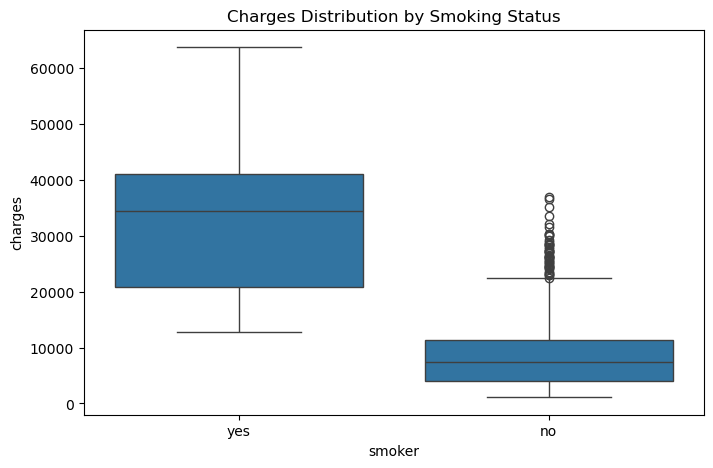

In [167]:
# Boxplot for charges vs smoker
plt.figure(figsize=(8, 5))
sns.boxplot(x='smoker', y='charges', data=idataset)
plt.title("Charges Distribution by Smoking Status")
plt.show()

This box plot compares the distribution of charges between smokers and non-smokers.
    Smokers have significantly higher charges, with a median value much greater than non-smokers, and a wider range of charges, including some extreme high values.
    Non-smokers have lower charges overall, with a tighter distribution and several outliers above the upper whisker. This suggests a strong association between smoking status and higher charges.

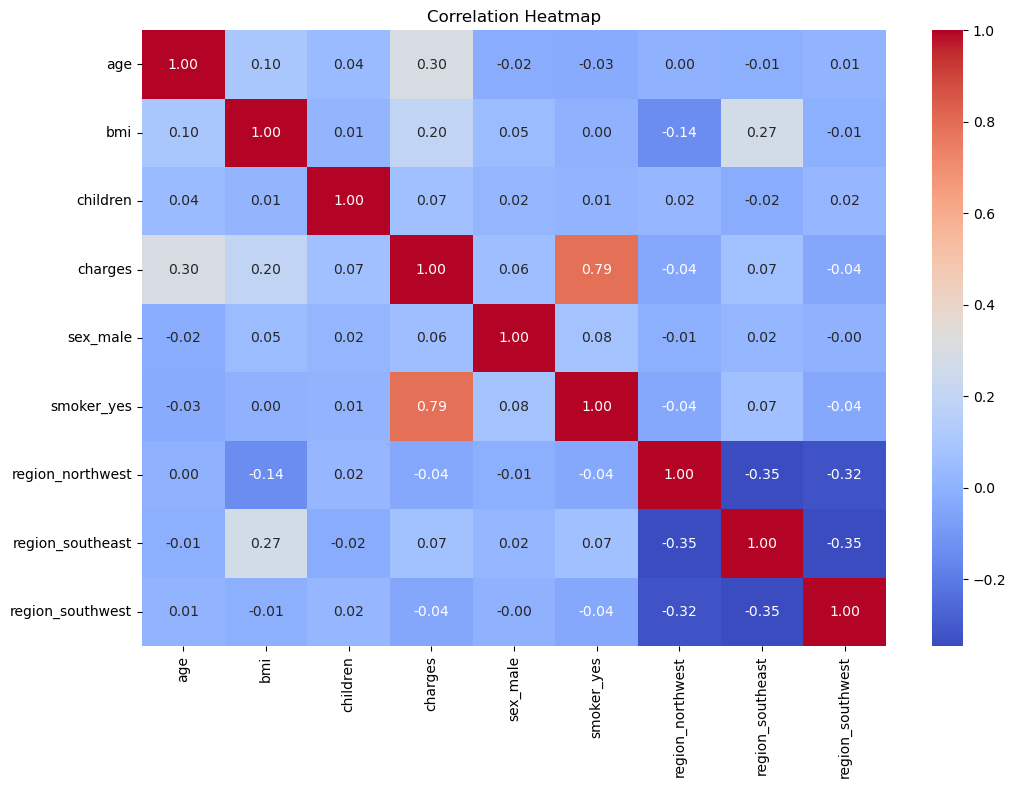

In [170]:
# Select only numeric columns for correlation
numeric_data = idataset.select_dtypes(include=[np.number])
# Apply one-hot encoding to categorical variables
idataset = pd.get_dummies(idataset, columns=['sex', 'smoker', 'region'], drop_first=True)
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = idataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

This correlation heatmap highlights relationships between variables in the dataset.
- Charges show a strong positive correlation with being a smoker (smoker_yes, 0.79) and moderate positive correlations with age (0.30) and BMI (0.20).
- Most other variables, such as the number of children and sex, have weak or negligible correlations with charges.
- Categorical variables like regions are slightly negatively correlated with one another due to encoding.
- Smoking is the most significant factor influencing charges.
- Overall, smoking and age are primary drivers of charges in this dataset.

## Data Preprocessing
In this section, categorical variables are encoded, and the dataset is split into training and testing subsets. This ensures the data is ready for modeling.

In [174]:
# Define features (X) and target variable (Y)
X = idataset.drop('charges', axis=1)  # Features (without the target variable)
Y = idataset['charges']  # Target variable

In [176]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## Random Forest Regressor

In [179]:
from sklearn.model_selection import cross_val_score

# Initialize the RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100, random_state=42)

# Perform 5-fold cross-validation with RMSE
cv_scores = cross_val_score(rfr, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")

# Train the model on the full training set
rfr.fit(X_train, Y_train)

# Make predictions on the test set
Y_pred = rfr.predict(X_test)

In [180]:
# Evaluate the model on the test set
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)  # Explicit RMSE calculation
r2 = r2_score(Y_test, Y_pred)

# Print results
print(f"Cross-Validation RMSE (Mean): {-cv_scores.mean():.2f}")
print(f"Cross-Validation RMSE (Std): {cv_scores.std():.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")

Cross-Validation RMSE (Mean): 5021.21
Cross-Validation RMSE (Std): 489.09
Mean Squared Error (MSE): 21026262.82
Root Mean Squared Error (RMSE): 4585.44
R-squared: 0.86


| Metric                          | Value      |
|---------------------------------|------------|
| Cross-Validation RMSE (Mean)    | 5021.21    |
| Cross-Validation RMSE (Std)     | 489.09     |
| Mean Squared Error (MSE)        | 21026262.82|
| Root Mean Squared Error (RMSE)  | 4585.44    |
| R-squared                       | 0.86      |


In [183]:
#Feature Importance Plot
feature_importances = rfr.feature_importances_
features = X.columns

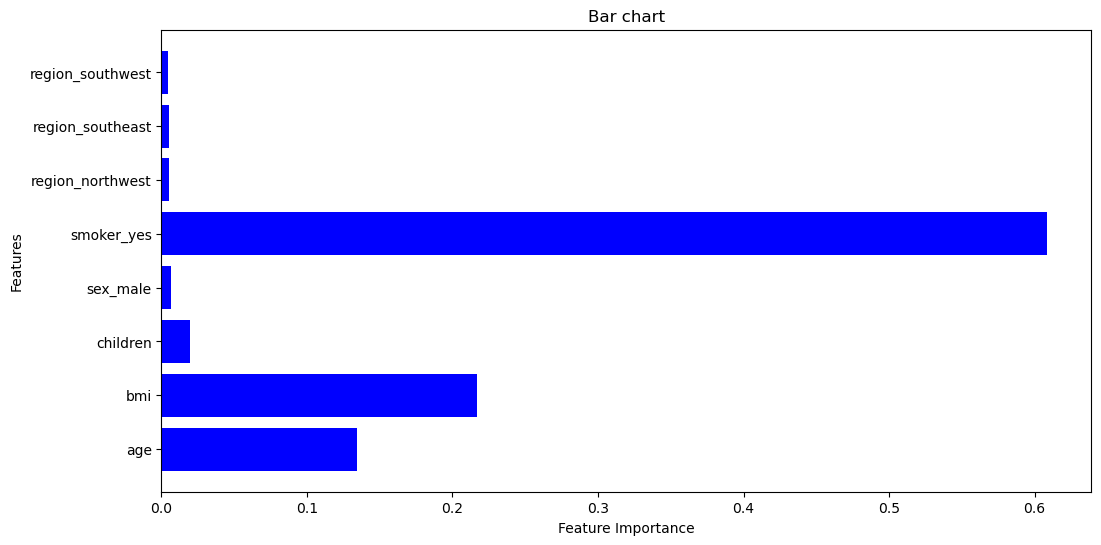

In [185]:
# Plot the feature importance
plt.figure(figsize=(12, 6))
plt.barh(features, feature_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Bar chart')
plt.show()

This bar chart shows the feature importance for predicting charges.
- The most significant factor is smoking status (smoker_yes), contributing the largest importance by a wide margin.
- Other notable factors include BMI and age, while variables like children, sex, and region have minimal impact.
- This emphasizes that being a smoker is the strongest predictor of charges, followed by health-related factors like BMI and age.

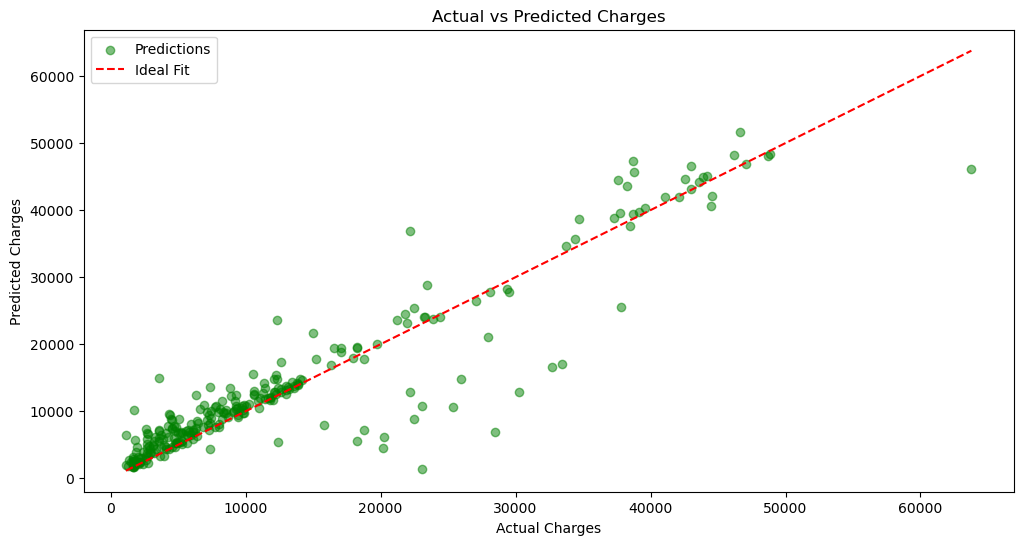

In [188]:
# Prediction vs Actual Plot
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred, color='green', alpha=0.5, label="Predictions")
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linestyle='--', label="Ideal Fit")
plt.title('Actual vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.legend()
plt.show()

This scatter plot shows the relationship between actual charges and predicted charges from the model. The red dashed line represents the ideal scenario where predictions perfectly match actual values. Most data points are closely aligned with the line, indicating accurate predictions, especially for lower charges. However, deviations increase for higher charges, suggesting the model struggles slightly with extreme values.

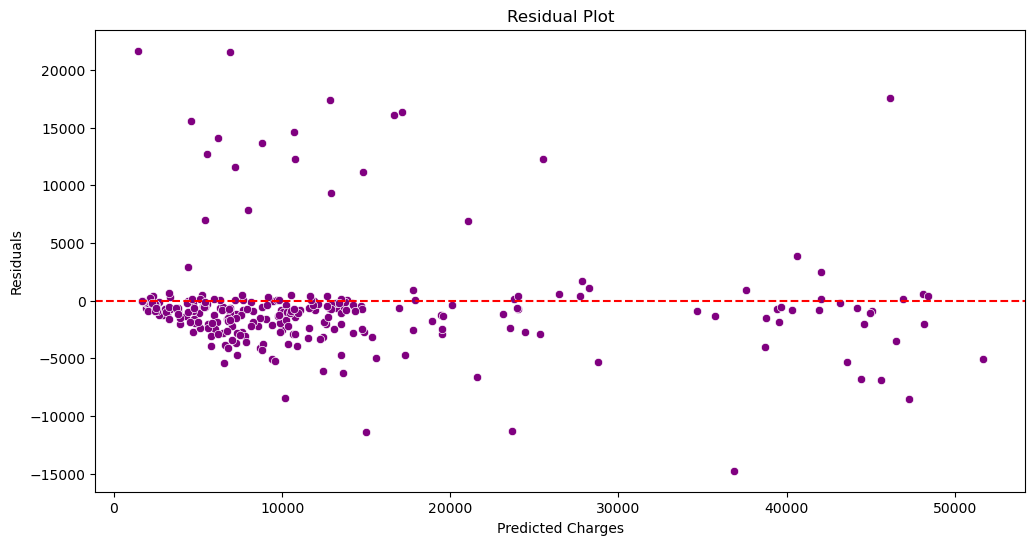

In [191]:
#Residual Plot
residuals = Y_test - Y_pred
plt.figure(figsize=(12, 6))
sns.scatterplot(x=Y_pred, y=residuals, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Charges')
plt.ylabel('Residuals')
plt.show()

This residual plot shows the differences between predicted and actual charges. Most residuals are centered around 0, indicating an overall unbiased model. However, there is a noticeable spread for higher predicted charges, with some large positive and negative residuals, suggesting the model struggles more with accurately predicting extreme values. This highlights potential areas for further model refinement.

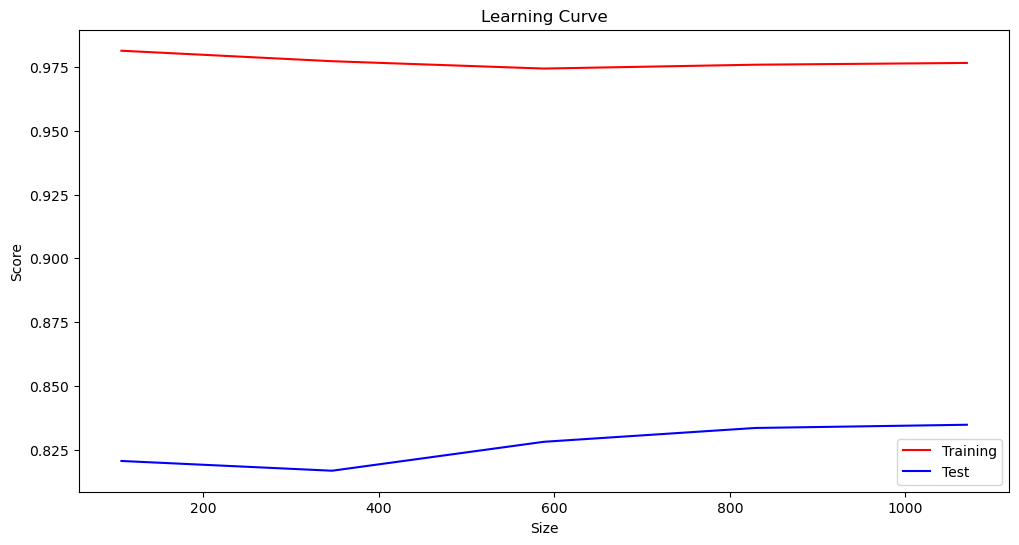

In [194]:
#Learning Curve Plot
train_sizes, train_scores, test_scores = learning_curve(rfr, X, Y, cv=5)

plt.figure(figsize=(12, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training', color='red')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test', color='blue')
plt.title('Learning Curve')
plt.xlabel('Size')
plt.ylabel('Score')
plt.legend()
plt.show()

This learning curve shows the model's performance as the training data size increases. The red line represents the training score, which starts high and slightly decreases as more data is added, indicating reduced overfitting. The blue line represents the test score, which improves as the training size increases, suggesting better generalization. The gap between the training and test scores indicates room for further model optimization to close the performance difference.

## Hyperparameter Tuning & Cross-Validation

In [195]:
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2', None]  # Number of features to consider when looking for the best split
}

In [196]:
# Initialize the RF model
rf_model = RandomForestRegressor(random_state=42)

In [197]:
# Perform GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    verbose=2,
    n_jobs=-1  # Use all available processors
)
# Fit the grid search to the data
grid_search.fit(X_train, Y_train)
# Extract the best parameters & the best parameters
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_
print("Best Parameters:", best_params)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}


In [201]:
# Evaluate the tuned model
Y_pred_tuned = best_rf_model.predict(X_test)
mse_tuned = mean_squared_error(Y_test, Y_pred_tuned)
rmse_tuned = mse_tuned ** 0.5
print(f"Tuned Model RMSE: {rmse_tuned:.2f}")

Tuned Model RMSE: 4485.85


In [202]:
#Check feature importance for the tuned model
feature_importances = best_rf_model.feature_importances_
print("Feature Importances:", feature_importances)

Feature Importances: [0.14366276 0.15546306 0.02237496 0.0069479  0.65456056 0.00501236
 0.00729846 0.00467994]


## Visualization

In [ ]:
# Get feature importances from the best model
feature_importances = best_rf_model.feature_importances_

# Get feature names (ensure X_train is a DataFrame for proper feature names)
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(len(feature_importances))]

# Create a sorted list of feature importances for better visualization
sorted_indices = np.argsort(feature_importances)[::-1]  # Sort in descending order
sorted_importances = feature_importances[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_feature_names, sorted_importances, color='blue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importances from Tuned Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.show()

This bar chart visualizes the feature importances from the tuned Random Forest model. Smoking status (smoker_yes) is by far the most important feature, contributing the largest weight to the model. Other key features include BMI and age, which also have notable influence. Features like the number of children, sex, and region have minimal impact on the model's predictions, indicating their relatively low importance in predicting charges.

In [ ]:
# Visualize the tuning results
results = grid_search.cv_results_

# Extract relevant data
params = results['params']
mean_scores = results['mean_test_score']

# Convert to DataFrame for easier manipulation
import pandas as pd
tuning_results = pd.DataFrame(params)
tuning_results['Mean Score'] = mean_scores

# Example visualization for one hyperparameter (e.g., 'n_estimators')
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for depth in tuning_results['max_depth'].unique():
    subset = tuning_results[tuning_results['max_depth'] == depth]
    plt.plot(subset['n_estimators'], -subset['Mean Score'], label=f"max_depth={depth}")

plt.xlabel('Number of Estimators')
plt.ylabel('Negative MSE')
plt.title('Effect of n_estimators on Performance')
plt.legend()
plt.show()


The graph justifies selecting **100-150 trees** for optimal performance, as adding more trees shows diminishing returns. A **maximum depth of 20-30** balances complexity and generalization, minimizing error. Shallow trees underfit, while overly deep trees risk overfitting. These settings provide the best trade-off between accuracy, efficiency, and reliability.

## Decision tree

In [128]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder

In [130]:
from sklearn.model_selection import cross_val_score

# Initialize the Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)

# Perform cross-validation on the training set using the new 'neg_root_mean_squared_error'
cv_scores = cross_val_score(dtr, X_train, Y_train, cv=5, scoring="neg_root_mean_squared_error")

# Fit the Decision Tree model on the training set
dtr.fit(X_train, Y_train)

# Predict on the test set
Y_pred = dtr.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, Y_pred)
rmse = root_mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Cross-Validation RMSE: {np.mean(-cv_scores):.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared: {r2:.2f}")


Cross-Validation RMSE: 6475.84
Mean Squared Error (MSE): 36444280.16
Root Mean Squared Error (RMSE): 36444280.16
R-squared: 0.77


| Metric                                  | Value         |
|-----------------------------------------|---------------|
| Cross-Validation RMSE                   | 6475.84       |
| Mean Squared Error (MSE)                | 36444280.16   |
| Root Mean Squared Error (RMSE)          | 6045.16       |
| R-squared                               | 0.77          |

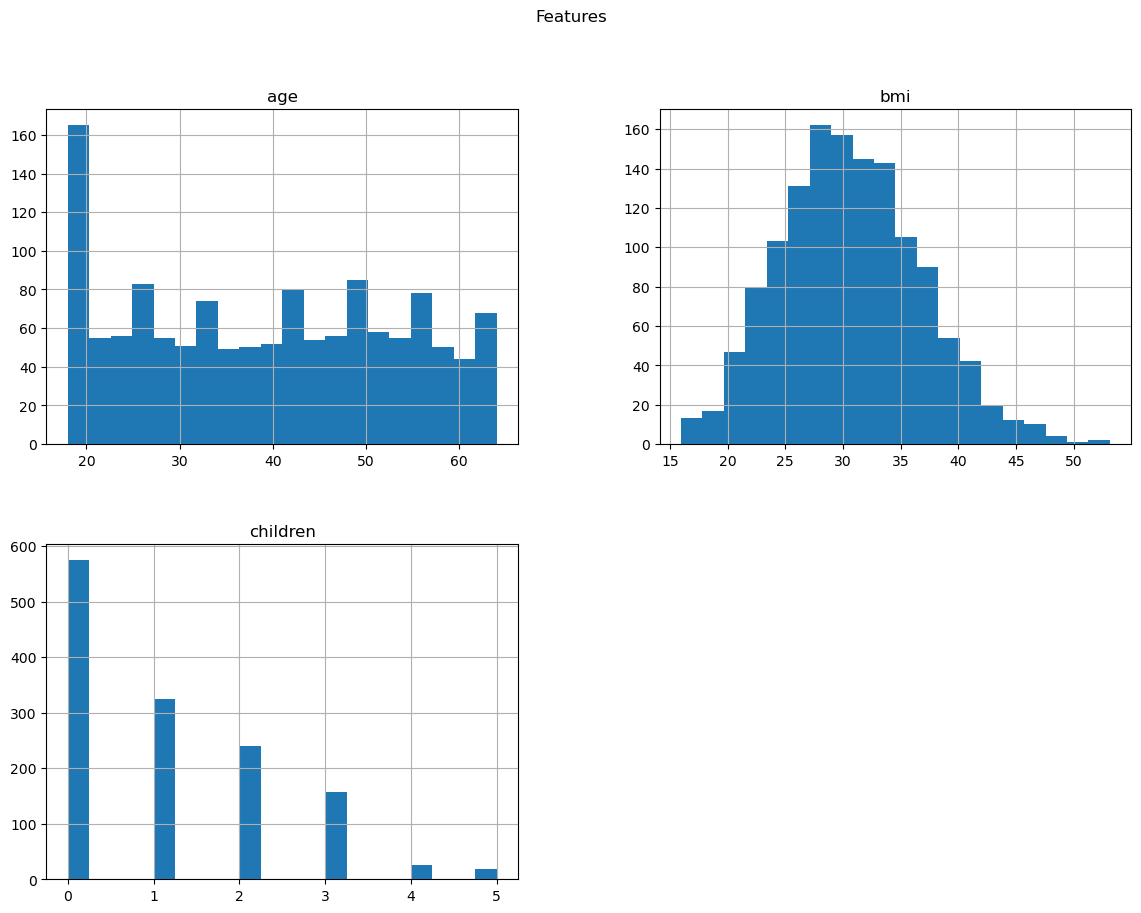

In [133]:
#Histogram for each numerical feature
X.hist(bins=20, figsize=(14, 10))
plt.suptitle('Features')
plt.show()

This figure shows histograms for three features: age, BMI, and children:

- Age: The distribution is roughly uniform, with a notable spike around age 18-20, indicating a higher concentration of younger individuals.
- BMI: The distribution is approximately bell-shaped (normal), centered around 25-30, indicating most individuals fall in this BMI range.
- Children: The distribution is skewed toward having fewer children, with the majority having 0-2 children, and very few having 4 or 5.

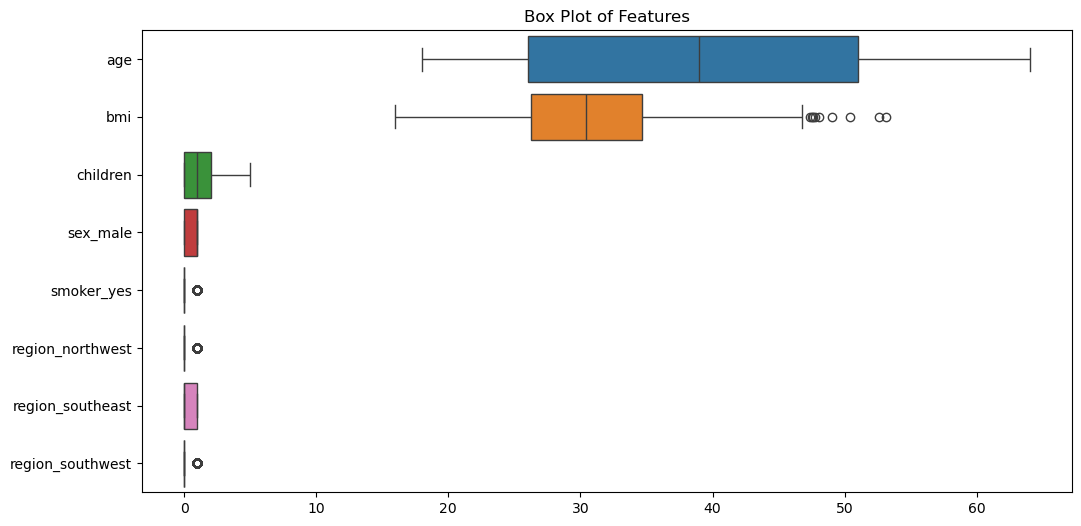

In [136]:
#Box Plot to visualize
plt.figure(figsize=(12, 6))
sns.boxplot(data=X, orient="h")
plt.title('Box Plot of Features')
plt.show()

This box plot visualizes the distribution of key features in the dataset:

- Age:Has a wide range, with values spanning from 20 to 60, and no significant outliers.
- BMI:Concentrated around 25–35, with a few outliers above 50.
- Children:Most values are between 0 and 3, with a small number of outliers for higher numbers of children.
- Categorical Features (sex_male, smoker_yes, region_*):Represent binary or categorical variables, showing minimal variation and some outliers.
  
The chart highlights that age and BMI are continuous with some variability, while children and categorical variables are more discrete

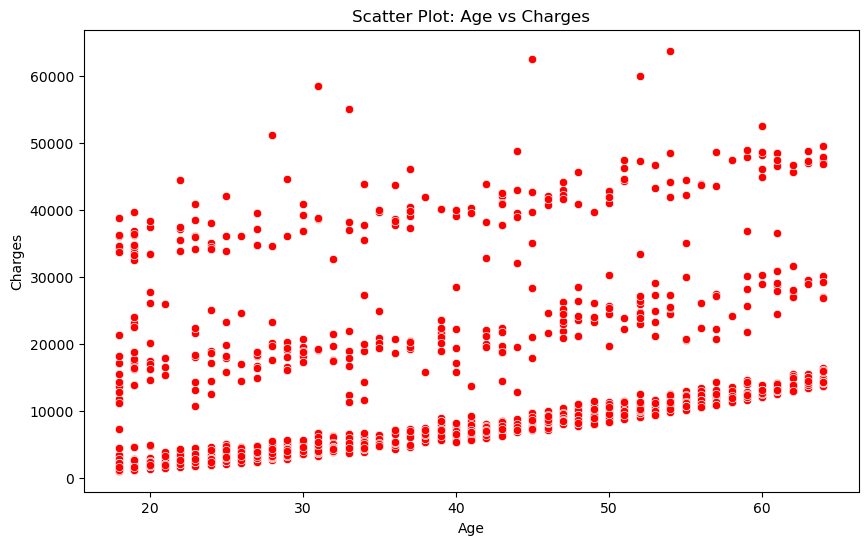

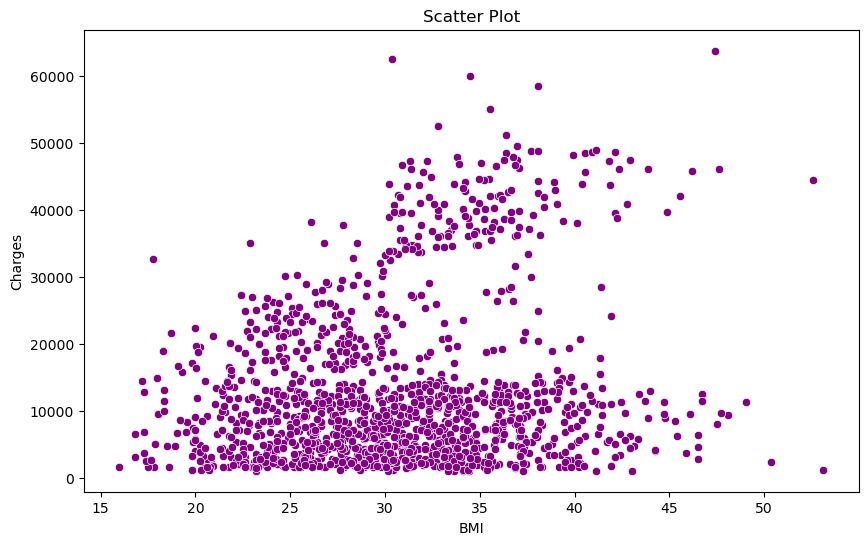

In [139]:
#Scatter Plot between 'age' and 'charges' (as an example)
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['age'], y=Y, color='red')
plt.title('Scatter Plot: Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

#Scatter plotS
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['bmi'], y=Y, color='purple')
plt.title('Scatter Plot')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.show()

- Scatter Plot: Age vs. Charges
This scatter plot shows a positive relationship between age and charges.
As age increases, the range of charges also tends to increase, with some individuals incurring much higher charges, especially in older age groups.
- Scatter Plot: BMI vs. Charges
This plot indicates a weak positive relationship between BMI and charges.
Higher BMI values are associated with higher charges, though the relationship is not as strong, and there is significant variability

## Hyperparameter Tuning & cross-validation

In [142]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# Define the decision tree model
dtree = DecisionTreeRegressor(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse']
}

In [144]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X, Y)

# Best parameters from GridSearch
print("Best Parameters:", grid_search.best_params_)

# Using the best model for cross-validation
best_model = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, Y, cv=5, scoring='neg_mean_squared_error')

print("Cross-validation Scores:", -cv_scores)
print("Mean CV Score:", -cv_scores.mean())

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END criterion=squared_error, max_depth=3, min_samples_leaf=1, min_samples_spl

In [145]:
# Evaluate the best model on the test set
Y_pred = best_model.predict(X_test)
test_mse = mean_squared_error(Y_test, Y_pred)
test_rmse = np.sqrt(test_mse)

print("Test Set MSE:", test_mse)
print("Test Set RMSE:", test_rmse)

Test Set MSE: 16810135.59716377
Test Set RMSE: 4100.016536206137


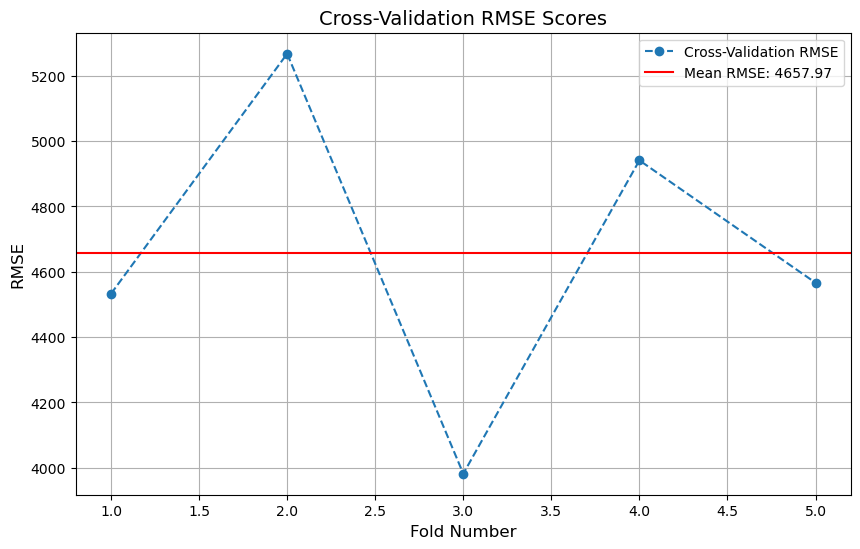

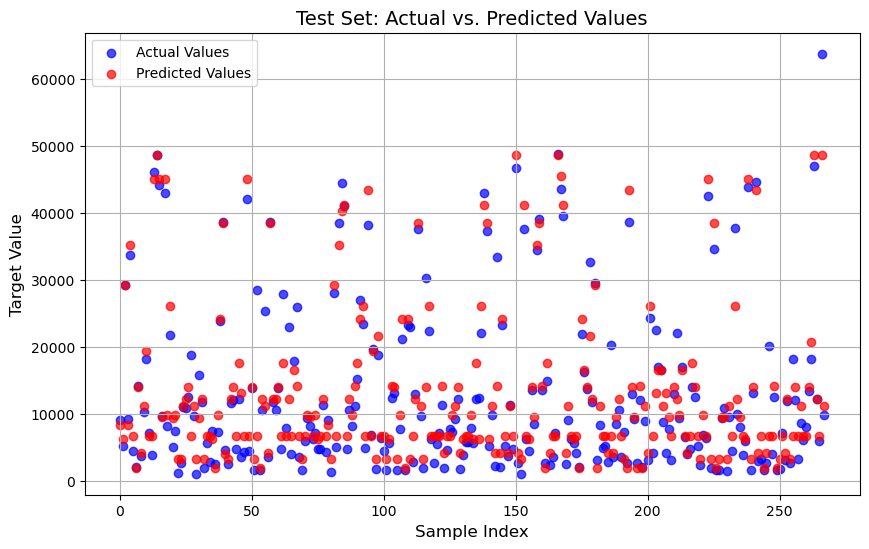

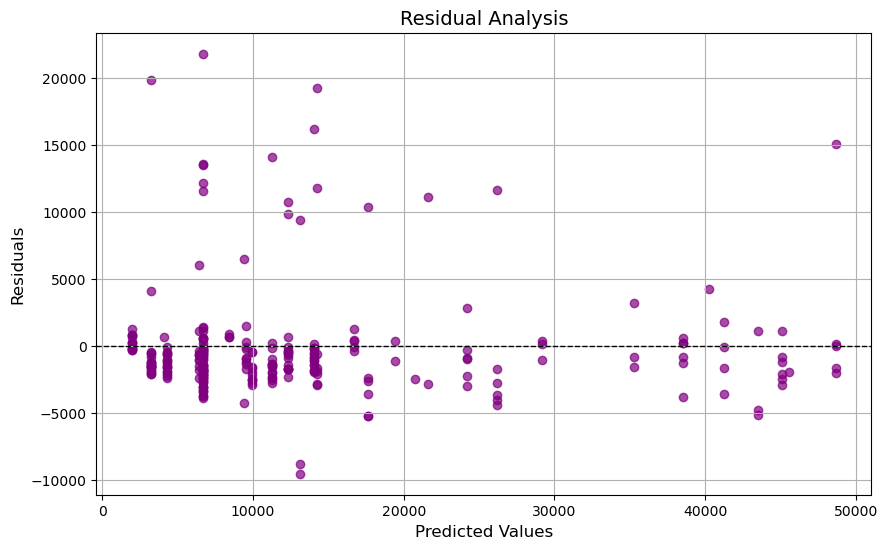

In [148]:
# 1. Cross-Validation Performance Visualization
cv_rmse = np.sqrt(-cv_scores)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cv_rmse) + 1), cv_rmse, marker='o', linestyle='--', label='Cross-Validation RMSE')
plt.axhline(y=cv_rmse.mean(), color='r', linestyle='-', label=f'Mean RMSE: {cv_rmse.mean():.2f}')
plt.title("Cross-Validation RMSE Scores", fontsize=14)
plt.xlabel("Fold Number", fontsize=12)
plt.ylabel("RMSE", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 2. Test Set Predictions vs. Actual Values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual Values', alpha=0.7)
plt.scatter(range(len(Y_pred)), Y_pred, color='red', label='Predicted Values', alpha=0.7)
plt.title("Test Set: Actual vs. Predicted Values", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Target Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# 3. Residual Plot
residuals = Y_test - Y_pred

plt.figure(figsize=(10, 6))
plt.scatter(Y_pred, residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Analysis", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)
plt.show()

1. Chart : Cross-Validation RMSE Scores
    - This plot shows the RMSE for each fold in a 5-fold cross-validation.
    - The RMSE values vary slightly across folds, with the mean RMSE (red line) at approximately 4657.97.
    - The variability suggests consistent performance, with fold 3 showing the best results and fold 2 the highest RMSE.
2. Chart : Test Set - Actual vs. Predicted Values
    - This scatter plot compares actual and predicted values for the test set.
    - The predicted values (red) generally align with actual values (blue), but some discrepancies exist, especially for higher target values.
    - This indicates the model is performing well but may struggle with certain outliers.
3. Chart : Residual Analysis
    - The residual plot visualizes the errors (differences between actual and predicted values).
    - Residuals are mostly centered around 0, indicating unbiased predictions.
    - However, larger residuals are observed for higher predicted values, suggesting the model has difficulty with extreme charges.

## Polynomial

In [95]:
# import libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

In [97]:
# Separate features and target
X = idataset.drop('charges', axis=1)  # Features (without the target variable)
y = idataset['charges']  # Target variable

In [99]:
# Separate numeric and categorical columns
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [101]:
print(X[categorical_cols].head())
print(X[categorical_cols].dtypes)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
Series([], dtype: object)


In [103]:
# Convert categorical columns (sex, smoker, region) using one-hot encoding
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [105]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [107]:
# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


# Define the parameter grid
param_grid = {
    'poly__degree': [2, 3, 4, 5],
    'linear__fit_intercept': [True, False]
}

# Create the pipeline
pipeline = Pipeline([
    ('poly', PolynomialFeatures()),
    ('linear', LinearRegression())
])

# Create and run GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train_imputed, y_train)

# Extract results and best degree
results = grid_search.cv_results_
optimal_degree = grid_search.best_params_['poly__degree']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [111]:
# Use the best pipeline for predictions
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Output results
print(f"Optimal Polynomial Degree: {optimal_degree}")
print(f"Cross-Validation RMSE: {np.sqrt(-grid_search.best_score_):.2f}")
print(f"Test Set Mean Squared Error (MSE): {mse:.2f}")
print(f"Test Set Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Test Set R-squared: {r2:.2f}")

Optimal Polynomial Degree: 2
Cross-Validation RMSE: 4966.39
Test Set Mean Squared Error (MSE): 20754875.07
Test Set Root Mean Squared Error (RMSE): 4555.75
Test Set R-squared: 0.87


| Metric                          | Value       |
|---------------------------------|-------------|
| **Optimal Polynomial Degree**   | 2           |
| **Cross-Validation RMSE**       | 4966.39     |
| **Test Set Mean Squared Error** | 20754875.07 |
| **Test Set Root Mean Squared Error (RMSE)** | 4555.75     |
| **Test Set R-squared**          | 0.87       |


## Visualization

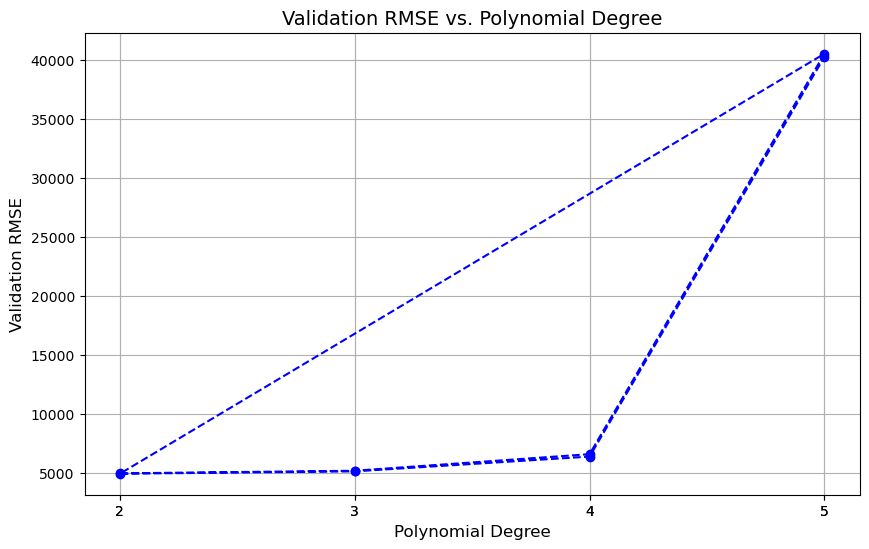

In [114]:
# Plot Validation RMSE vs. Polynomial Degree
degrees = [param['poly__degree'] for param in results['params']]
mean_rmse = np.sqrt(-results['mean_test_score'])

plt.figure(figsize=(10, 6))
plt.plot(degrees, mean_rmse, marker='o', linestyle='--', color='b')
plt.title('Validation RMSE vs. Polynomial Degree', fontsize=14)
plt.xlabel('Polynomial Degree', fontsize=12)
plt.ylabel('Validation RMSE', fontsize=12)
plt.xticks(degrees)
plt.grid(True)
plt.show()

The chart shows how the validation Root Mean Squared Error (RMSE) changes with increasing polynomial degrees (2 to 5).
- The validation RMSE is lowest at degree 2, indicating the best performance for this degree.
- As the polynomial degree increases beyond 2, the validation RMSE rises significantly, especially at degrees 4 and 5.
- This suggests overfitting with higher-degree polynomials, as the model becomes too complex and fails to generalize well.

In [208]:
# Define degrees to test
# Function to evaluate a specific polynomial degree
def evaluate_degree(degree, X_train, X_test, y_train, y_test):
    # Create a pipeline with PolynomialFeatures and LinearRegression
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])
    
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")
    mean_cv_rmse = np.mean(-cv_scores)
    
    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate on the test set
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Return evaluation metrics and predictions
    return mean_cv_rmse, mse, rmse, r2, y_pred

In [118]:
# Evaluate degree 2
degree_2_results = evaluate_degree(2, X_train_imputed, X_test_imputed, y_train, y_test)
print(f"Degree 2 - Cross-Validation RMSE: {degree_2_results[0]:.2f}, Test RMSE: {degree_2_results[2]:.2f}, R2: {degree_2_results[3]:.2f}")

# Evaluate degree 3
degree_3_results = evaluate_degree(3, X_train_imputed, X_test_imputed, y_train, y_test)
print(f"Degree 3 - Cross-Validation RMSE: {degree_3_results[0]:.2f}, Test RMSE: {degree_3_results[2]:.2f}, R2: {degree_3_results[3]:.2f}")


Degree 2 - Cross-Validation RMSE: 4968.54, Test RMSE: 4571.01, R2: 0.87
Degree 3 - Cross-Validation RMSE: 5181.78, Test RMSE: 5006.83, R2: 0.84


| Polynomial Degree | Cross-Validation RMSE | Test RMSE | R² Score |
|--------------------|------------------------|-----------|----------|
| 2                  | 4968.54               | 4571.01   | 0.87     |
| 3                  | 5181.78               | 5006.83   | 0.84     |


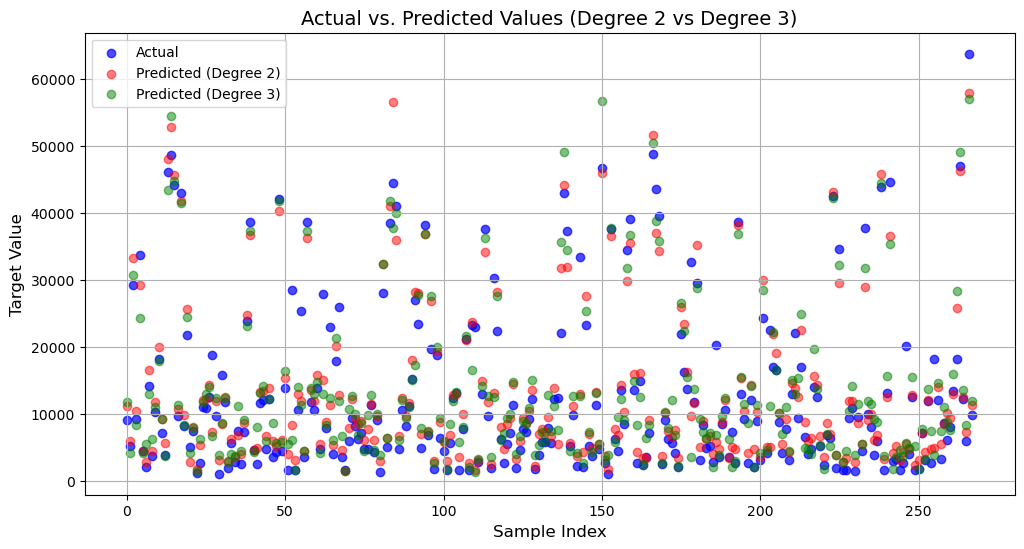

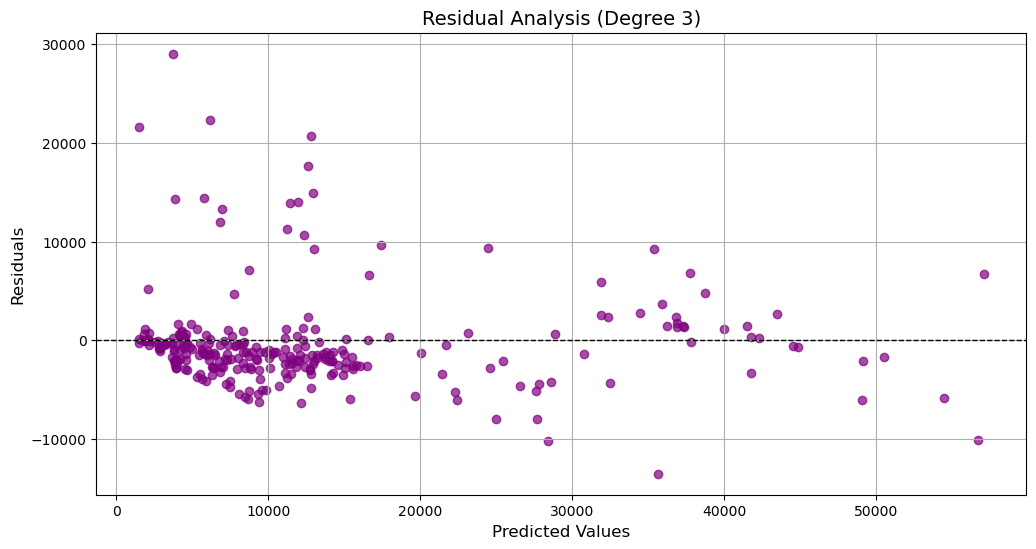

In [124]:
# Visualize Actual vs Predicted for both degrees
plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual', alpha=0.7)
plt.scatter(range(len(degree_2_results[4])), degree_2_results[4], color='red', label='Predicted (Degree 2)', alpha=0.5)
plt.scatter(range(len(degree_3_results[4])), degree_3_results[4], color='green', label='Predicted (Degree 3)', alpha=0.5)
plt.title("Actual vs. Predicted Values (Degree 2 vs Degree 3)", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Target Value", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Residual Analysis for Degree 3
residuals_3 = y_test - degree_3_results[4]

plt.figure(figsize=(12, 6))
plt.scatter(degree_3_results[4], residuals_3, color='purple', alpha=0.7)
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
plt.title("Residual Analysis (Degree 3)", fontsize=14)
plt.xlabel("Predicted Values", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid(True)
plt.show()


- Actual vs Predicted Values (Degree 2 vs Degree 3):
    - Both the degree 2 and degree 3 polynomial models show strong predictive capabilities, with predicted values closely matching the actual values.
    - The performance of the degree 2 and degree 3 models is comparable, with significant overlap in their predictions.
    - Some outliers indicate that certain target values are not well-predicted by either model.
- Residual Analysis (Degree 3):
    - The residuals (errors) are generally centered around zero, demonstrating unbiased predictions.
    - Larger residuals are observed for higher predicted values, highlighting a challenge in accurately modeling extreme cases.
    - A few extreme outliers suggest opportunities for further model refinement or feature engineering.